##Temu 10

### Visualisasi Data

Visualisasi Data dengan Python

[ 0.          0.1010101   0.2020202   0.3030303   0.4040404   0.50505051
  0.60606061  0.70707071  0.80808081  0.90909091  1.01010101  1.11111111
  1.21212121  1.31313131  1.41414141  1.51515152  1.61616162  1.71717172
  1.81818182  1.91919192  2.02020202  2.12121212  2.22222222  2.32323232
  2.42424242  2.52525253  2.62626263  2.72727273  2.82828283  2.92929293
  3.03030303  3.13131313  3.23232323  3.33333333  3.43434343  3.53535354
  3.63636364  3.73737374  3.83838384  3.93939394  4.04040404  4.14141414
  4.24242424  4.34343434  4.44444444  4.54545455  4.64646465  4.74747475
  4.84848485  4.94949495  5.05050505  5.15151515  5.25252525  5.35353535
  5.45454545  5.55555556  5.65656566  5.75757576  5.85858586  5.95959596
  6.06060606  6.16161616  6.26262626  6.36363636  6.46464646  6.56565657
  6.66666667  6.76767677  6.86868687  6.96969697  7.07070707  7.17171717
  7.27272727  7.37373737  7.47474747  7.57575758  7.67676768  7.77777778
  7.87878788  7.97979798  8.08080808  8.18181818  8

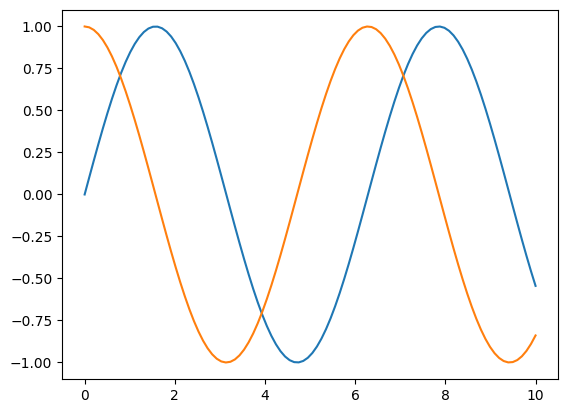

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

x = np.linspace(0,10,100)

print(x)

plt.plot(x, np.sin(x))
plt.plot(x, np.cos(x))
plt.show()

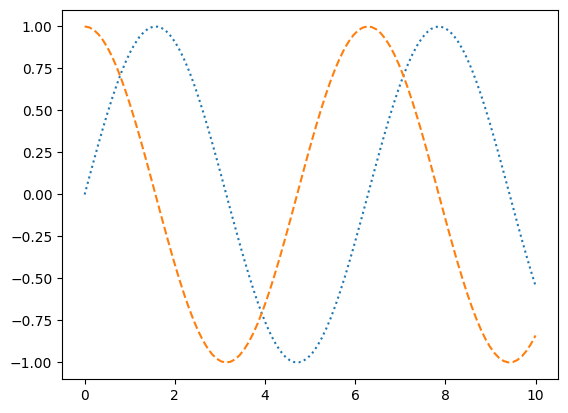

In [ ]:
plt.plot(x, np.sin(x), ':')
plt.plot(x, np.cos(x), '--')
plt.show()

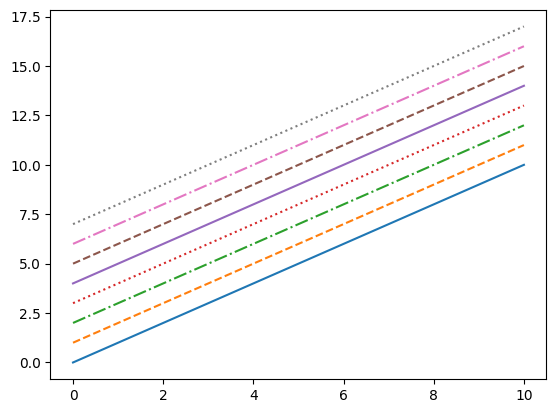

In [ ]:
plt.plot(x, x + 0, linestyle='solid')
plt.plot(x, x + 1, linestyle='dashed')
plt.plot(x, x + 2, linestyle='dashdot')
plt.plot(x, x + 3, linestyle='dotted')

plt.plot(x, x + 4, linestyle='-')
plt.plot(x, x + 5, linestyle='--')
plt.plot(x, x + 6, linestyle='-.')
plt.plot(x, x + 7, linestyle=':')

plt.show()

### SQL

Dasar SQL dengan Python